In [1]:
import folium
import pandas as pd
import json


url = ("https://raw.githubusercontent.com/python-visualization/"
       "folium/master/examples/data")

us_states = f"{url}/us-states.json"
US_Unemployment_Oct2012 = f"{url}/US_Unemployment_Oct2012.csv"

state_data = pd.read_csv(US_Unemployment_Oct2012)

m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data=us_states,
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
    highlight=True
).add_to(m)

m

In [2]:
from folium.plugins import Draw


m = folium.Map(
    location=[-27.23, -48.36],
    zoom_start=10,
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/Ocean_Basemap/MapServer/tile/{z}/{y}/{x}",
	attr="Tiles &copy; Esri &mdash; Sources: GEBCO, NOAA, CHS, OSU, UNH, CSUMB, National Geographic, DeLorme, NAVTEQ, and Esri",
)

draw = Draw(export=True)
draw.add_to(m)

m

In [3]:
from owslib.wms import WebMapService


url = "http://oos.soest.hawaii.edu/thredds/wms/hioos/satellite/dhw_5km"

web_map_services = WebMapService(url)

layer = "CRW_SST"
wms = web_map_services.contents[layer]

name = wms.title

lon = (wms.boundingBox[0] + wms.boundingBox[2]) / 2.
lat = (wms.boundingBox[1] + wms.boundingBox[3]) / 2.
center = lat, lon

time_interval = "{0}/{1}".format(
    wms.timepositions[0].strip(),
    wms.timepositions[-1].strip()
)
style = "boxfill/sst_36"

if style not in wms.styles:
    style = None

In [4]:
m = folium.Map(
    location=[lat, lon],
    zoom_start=5,
    control_scale=True,
    tiles="Stamen Toner",
)

w = folium.raster_layers.WmsTileLayer(
    url=url,
    name="sea_surface_temperature",
    styles=style,
    fmt="image/png",
    transparent=True,
    layers="CRW_SST",
    overlay=True,
).add_to(m)

time = folium.plugins.TimestampedWmsTileLayers(
    [w],
    period="PT1H",
    time_interval=time_interval,
)

time.add_to(m)

folium.LayerControl().add_to(m)

m

In [5]:

df = pd.DataFrame(data=[["apple", "oranges"], ["other", "stuff"]], columns=["cats", "dogs"])

m = folium.Map(
    [43, -100],
    zoom_start=4,
    tiles="cartodbpositron",
)

html = df.to_html(
    classes=(
        "table table-striped "
        "table-hover "
        "table-condensed "
        "table-responsive"
    )
)

popup = folium.Popup(html)

folium.Marker([30, -100], popup=popup).add_to(m)

m

In [6]:
m = folium.plugins.DualMap(
    location=(52.1, 5.1),
    tiles=None,
    zoom_start=8,
)

folium.TileLayer("Stamen Watercolor").add_to(m.m1)
folium.TileLayer("cartodbpositron").add_to(m.m2)

folium.LayerControl(collapsed=False).add_to(m)

m

In [7]:
lat = +38.89399
lon = -77.03659
zoom_start = 17

m = folium.Map(
    tiles="Stamen Terrain",
    location=[lat, lon],
    zoom_start=zoom_start
)

kw = {
    "color": "red",
    "fill": True,
    "radius": 20
}

folium.CircleMarker([38.89415, -77.03738], **kw).add_to(m)
folium.CircleMarker([38.89415, -77.03578], **kw).add_to(m)


locations = [
    [(38.893596444352134, -77.03814983367920), (38.893379333722040, -77.03792452812195)],
    [(38.893379333722040, -77.03792452812195), (38.893162222428310, -77.03761339187622)],
    [(38.893162222428310, -77.03761339187622), (38.893028615148424, -77.03731298446655)],
    [(38.893028615148424, -77.03731298446655), (38.892920059048464, -77.03691601753235)],
    [(38.892920059048464, -77.03691601753235), (38.892903358095296, -77.03637957572937)],
    [(38.892903358095296, -77.03637957572937), (38.893011914220770, -77.03592896461487)],
    [(38.893011914220770, -77.03592896461487), (38.893162222428310, -77.03549981117249)],
    [(38.893162222428310, -77.03549981117249), (38.893404384982480, -77.03514575958252)],
    [(38.893404384982480, -77.03514575958252), (38.893596444352134, -77.03496336936950)]
]

folium.PolyLine(
    locations=locations,
    color="orange",
    weight=8,
    opacity=1,
    smooth_factor=0,
).add_to(m)

m

In [8]:
from cartopy.io.shapereader import natural_earth

import geopandas


fname = natural_earth(
    name="admin_0_countries",
    resolution="10m",
    category="cultural"
)
gdf = geopandas.read_file(fname)

south_america = gdf[gdf["CONTINENT"] == "South America"]

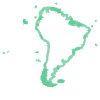

In [9]:
from shapely.ops import unary_union


geometries = [
    country["geometry"] for k, country in south_america.iterrows()
]
sa = unary_union(geometries)
sa.boundary

In [10]:
fname = natural_earth(
    name="rivers_lake_centerlines",
    resolution="10m",
    category="physical"
)

rivers = geopandas.read_file(fname)

In [11]:
from shapely.geometry import box

sasq = box(*sa.bounds)

mask = []
for k, river in rivers.iterrows():
    geom = river["geometry"]
    if geom:
        ans = sasq.contains(geom)
    else:
        ans = False
    mask.append(ans)
        

sa_rivers = rivers[mask]

# I ? unicode!
set(sa_rivers["name"])

{'AjajÃº',
 'Amapari',
 'Amazonas',
 'Apure',
 'Araguaia',
 'AripuanÃ£',
 'Atrato',
 'Beni',
 'Bermejo',
 'Bois',
 'Braco Menor',
 'Branco',
 'BÃ\xado-BÃ\xado',
 'CaquetÃ¡',
 'CarcaraÃ±Ã¡',
 'CaronÃ\xad',
 'Casiquiare',
 'Cauca',
 'Chico',
 'Chubut',
 'Coari',
 'Coco',
 'Cojedes',
 'Colorado',
 'Contas',
 'CopiapÃ³',
 'Corantijn',
 'CorumbÃ¡',
 'Courantyne',
 'Culuene',
 'Cuyuni',
 'Desaguadero',
 'Deseado',
 'Doce',
 'Dulce',
 'Essequibo',
 'Gallegos',
 'Grande',
 'GuainÃ\xada',
 'GuaporÃ©',
 'Gurupi',
 'GuÃ¡rico',
 'Huallaga',
 'IbicuÃ\xad',
 'IndaiÃ¡',
 'Iriri',
 'Itiquira',
 'Ituxi',
 'IvaÃ\xad',
 'Ivinheima',
 'Jamanxim',
 'JapurÃ¡',
 'Jari',
 'Javari',
 'JejuÃ\xad GuazÃº',
 'Jequitinhonha',
 'JiparanÃ¡',
 'Juruena',
 'JuruÃ¡',
 'JutaÃ\xad',
 'Kabalebo',
 'Lempa',
 'Limay',
 'Litani',
 'Madeira',
 'Madre de Dios',
 'Magdalena',
 'Maicuru',
 'MamorÃ©',
 'MaraÃ±Ã³n',
 'Maroni',
 'Mearim',
 'Mendoza',
 'Meta',
 'Mico',
 'Mira',
 'Miranda',
 'Napo',
 'Negro',
 'NeuquÃ©n',
 'NhamundÃ¡'

In [12]:
include = {
    2: "Amazonas",
    78: "Negro",
    91: "Madeira",
    99: "Paraná",
    100: "Araguaia",
    104: "São Francisco",
    108: "Paranaíba",
    115: "Tocantins",
    197: "Xingu",
    200: "Tapajós",
    284: "Jequitinhonha",
    293: "Uruguay",
    335: "Tocantins",
    400: "Paranapanema",
    436: "Parnaíba",
    515: "Doce",
    688: "Tietê",
}

In [13]:
for rivernum, name in include.items():
    rivers.loc[rivers["rivernum"] == rivernum, "name"] = name

In [14]:
def invert(coords):
    if hasattr(coords, '__iter__'):
        if hasattr(coords[0], '__iter__'):
            return list(map(invert, coords))
        else:
            return list(coords[::-1])
    else:
        return coords


def polyline(geom):
    line = unary_union(geom)
    if isinstance(geom, MultiLineString):
        line = linemerge(line)
    coords = line.__geo_interface__['coordinates']
    return invert(coords)

In [15]:
from shapely.ops import unary_union, linemerge
from shapely.geometry import MultiLineString
from shapely.geometry import LineString

import folium
from folium.plugins import Fullscreen
from folium.plugins import AntPath


url = "https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png"
attr = "Map data: &copy; <a href='http://www.openstreetmap.org/copyright'>OpenStreetMap</a>, <a href='http://viewfinderpanoramas.org'>SRTM</a> | Map style: &copy; <a href='https://opentopomap.org'>OpenTopoMap</a> (<a href='https://creativecommons.org/licenses/by-sa/3.0/'>CC-BY-SA</a>)"

m = folium.Map(tiles=url, attr=attr)
Fullscreen(position="topright", force_separate_button=True).add_to(m)

for name in set(include.values()):
    geom = rivers.loc[rivers["name"] == name, "geometry"].squeeze()
    if name in ["Amazonas", "Tocantins"]:
        reverse = True
    else:
        reverse = False
    AntPath(
        locations=polyline(geom),
        tooltip=f"{name}",
        reverse=reverse,
    ).add_to(m)
    

m.fit_bounds(m.get_bounds())

m